## 13-3 딥네트워크의 시작


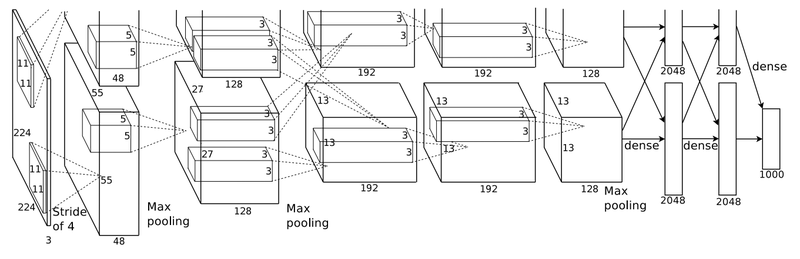


AlexNet에서는 가장 깊게 실험된 조건이 7개의 CNN과 2개의 FCN을 사용했다.
논문의 Table2에서 해당조겅르 확인할 수 있는데 7개의 CNN모델에는 Pre-training을 적용했다.

## 13-4 CNN을 잘쓰쟈!
VGG Alex Net: 이미지넷 챌린지 준우승을 거둠 <br>
    - VGG16: 16개의 층 <br>
    - VGG19: 19개의 층 <br>
output parameter: $((input image size-filtersize)/stride+1)$ <br>
parameter의 개수: filter size * filter size * channel <br> <br>


#### 노드 Q)  7x7 filter를 1번만 사용한 convolution 연산과 3x3 filter를 3번 사용한 convolution 연산을 비교하면 output 이미지의 크기와 parameter 개수에 어떤 차이가 있을까요? 한 번 계산해보고 vgg의 효율성을 체감해보세요! (stride=1로 생각합니다.) <br>
A)[output 이미지의 크기]
본문의 예제와 같이 28x28x1 이미지에 7x7 filter를 1번 사용하면 output 이미지의 크기는 22x22x1이 됩니다. 
3x3 filter를 3번 사용하면 28x28x1 이미지는 26x26x1→24x24x1→22x22x1이 되어 7x7 filter를 1번 적용한 것과 같은 결과가 나옵니다.
<br> 
[parameter의 개수]
7x7 filter를 사용하는 경우에는 7x7=49개의 parameter가 필요합니다.
반면에 3x3 filter 3개를 사용하면 3x3x3=27개의 parameter만 필요하죠.

## 13-6 ResNet
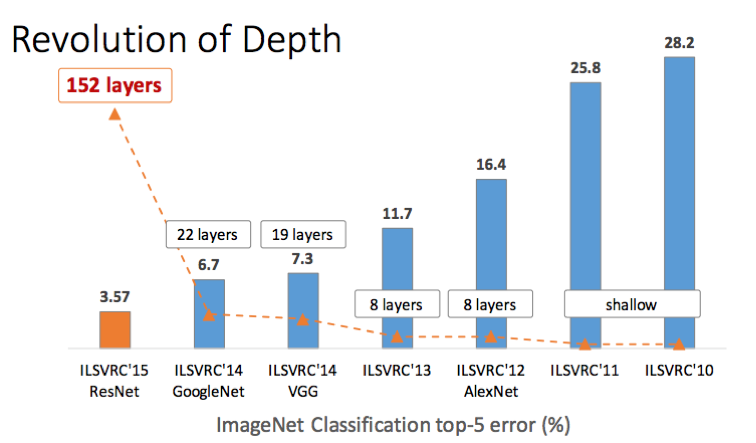 <br> <br>


skip connection이라는 구조를 사용함 <br>
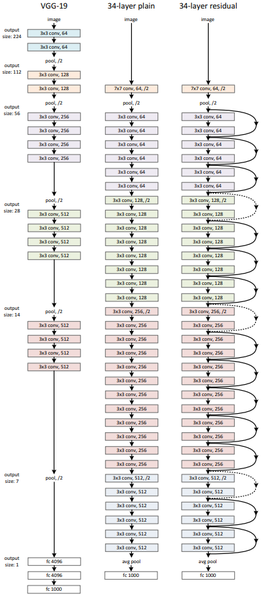 <br>

skip connection이 있는 블록을 residual block이라고 한다.<br>
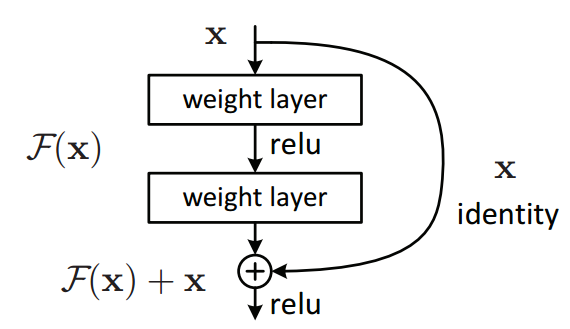 <br> <br>



#### 노드 Q)  skip connection을 가진 네트워크! <br>
A) Segmentation에서 활용되는 U-Net의 구조도 일종의 skip connection이라고 할 수 있다.

## 13-8 Model API

VGG-16: https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py <br>
ResNet-50: https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py <br>


## 13-9 VGG-16

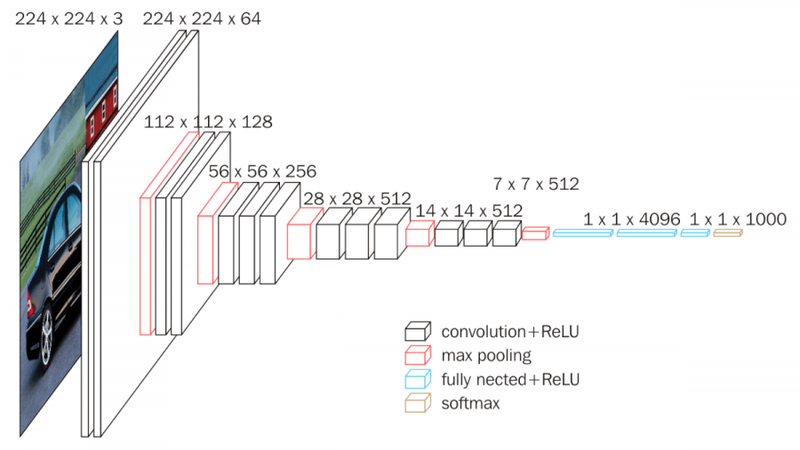

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CIFAR100 데이터셋을 가져옵시다. 
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 50000 x_test: 10000


In [2]:
img_input = keras.Input(shape=(32, 32, 3))

x = keras.layers.Conv2D(16, 3, activation='relu')(img_input)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Conv2D(32, 3, activation='relu')(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168

왜 인지 모르겠는데, 13-9 동일 노드 페이지를 켜놓은채로 하면, 주피터에서 실행 중 커널이 끊긴다, 주피터를 실행시키고 싶다면 13-9페이지는 넘어가서 실행하도록 하자.

In [3]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 51s 31ms/step - loss: 3.6697 - accuracy: 0.1447


각 블록의 구성이 어떻게 다른지 보기

In [4]:
# 첫 번째 블록 - Max Pooling까지
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

print('첫 번째 블록 OK!!')

첫 번째 블록 OK!!


In [5]:
# Q. 두 번째 블록 - Max Pooling까지
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1')(x)
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)


print('두 번째 블록 OK!!')

두 번째 블록 OK!!


In [6]:
# Q. 세 번째 블록 - Max Pooling까지
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)


print('세 번째 블록 OK!!')

세 번째 블록 OK!!


In [7]:
# Q. 네 번째 블록 - Max Pooling까지
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

print('네 번째 블록 OK!!')

네 번째 블록 OK!!


In [8]:
# Q. 다섯 번째 블록 - Max Pooling까지
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

print('다섯 번째 블록 OK!!')

다섯 번째 블록 OK!!


In [9]:
# Q. 여섯 번째 블록 - 완전 연결 레이어 + softmax까지
# [Keras VGG16 코드 구현] 링크의 if include_top: 부분을 유심히 보세요 

def VGG16(include_top=True,
          weights='imagenet',
          input_tensor=None,
          input_shape=None,
          pooling=None,
          classes=1000,
          **kwargs):


        if include_top:
            # Classification block
            x = layers.Flatten(name='flatten')(x)
            x = layers.Dense(4096, activation='relu', name='fc1')(x)
            x = layers.Dense(4096, activation='relu', name='fc2')(x)
            x = layers.Dense(classes, activation='softmax', name='predictions')(x)
        else:
            if pooling == "avg":
                x = layers.GlobalAveragePooling2D()(x)
            elif pooling == "max":
                x = layers.GlobalMaxPooling2D()(x)


        print('여섯 번째 블록 OK!!')

        classes=100
        x = layers.Dense(classes, activation='softmax', name='predictions')(x)    # CIFAR100을 위한 모델 Output

In [10]:
model = keras.Model(name="VGG-16", inputs=img_input, outputs=x)

model.summary()

Model: "VGG-16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0    

## 13-10 ResNet-50

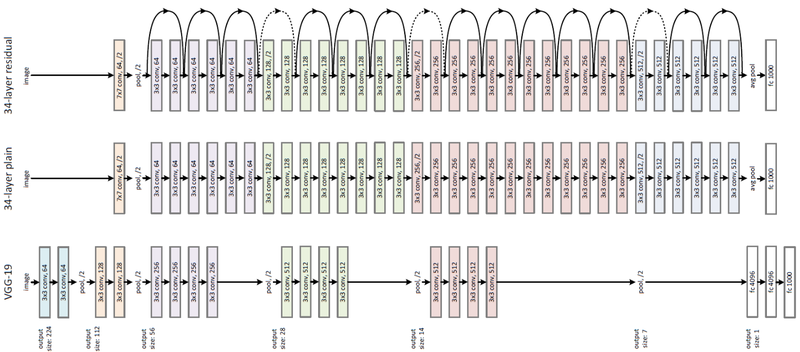 <br>

skip connection이 추가되어 있는 ResNet


block마다 feature의 크기가 서로 다르고 이를 서로 다른 색으로 표현했다. 크게 4개의 stage로 구분할 수 있고, 하나의 stage안에서는 kernel사이즈와 channel수가 동일하다. 이런 블록은 일ㅇ리이 하나씩 짜지 않고 블록 단위로 생성한다.

ResNet50 모델을 생성하기 위해서 conv_block과 identity_block이 있다. 이 둘을 활용하여 레이어가 50개가 된다고 하더라도 간결하게 표현할 수 있다.

In [12]:
# 추가로 import해야 할 패키지들을 먼저 가져옵니다. 
from tensorflow.keras import backend, regularizers, initializers, models

# block 안에 반복적으로 활용되는 L2 regularizer를 선언해 줍니다.
def _gen_l2_regularizer(use_l2_regularizer=True, l2_weight_decay=1e-4):
    return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None

print('Resnet50 GoGo!!')

Resnet50 GoGo!!


In [13]:
# Q. conv_block 함수를 가져옵니다.
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               batch_norm_decay=0.9,
               batch_norm_epsilon=1e-5):
    
    filters1, filters2, filters3 = filters 
    if backend.image_data_format() == "channels_last":
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block() + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'


    return x

In [14]:
# Q. identity_block을 가져옵니다.
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True,
                   batch_norm_decay=0.9,
                   batch_norm_epsilon=1e-5):

    filters1, filters2, filters3 = filters 
    if backend.image_data_format() == "channels_last":
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + "_branch"
    bnn_name_base = 'bn' + str(stage) + block + '_branch'
    return x

input_shape = (224, 224, 3)으로 선언, CIFAR100을 다루고 있음, input_shape=(32, 32, 3)

In [22]:
# Q. resnet50 함수를 가져옵니다.
def resnet50(num_classes, batch_size=None, use_l2_regularizer=True, rescale_inputs=False, 
             batch_norm_decay=0.9, batch_norm_epsilon=1e-5):



    input_shape = (32, 32, 3)
    img_input = layers.Input(shape=input_shape, batch_size=batch_size)

    if backend.image_data_format() == 'channels_first':
        x = layers.Lambda(
            lambda x: backend.permute_dimensions(x, (0, 3, 1, 2)),
            name='transpose')(img_input)
        bn_axis = 1
    else:  # channels_last
        x = img_input
        bn_axis = 3

    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
    x = layers.Conv2D(
        64, (7, 7),
        strides=(2, 2),
        padding='valid',
        use_bias=False,
        kernel_initializer='he_normal',
        kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
        name='conv1')(x)
    x = layers.BatchNormalization(
        axis=bn_axis,
        momentum=batch_norm_decay,
        epsilon=batch_norm_epsilon,
        name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)




    rm_axes = [1, 2] if backend.image_data_format() == 'channels_last' else [2, 3]
    x = layers.Lambda(lambda x: backend.mean(x, rm_axes), name='reduce_mean')(x)
    x = layers.Dense(
        num_classes,
        kernel_initializer = initializers.RandomNormal(stddev=0.01),
        bias_regularizer = _gen_l2_regularizer(use_l2_regularizer),
        name = 'fc1000')(x)

    x = layers.Activation('softmax', dtype='float32')(x)
    
    return models.Model(img_input, x, name='resnet50')

In [24]:
model = resnet50(num_classes=100)

# model
model.summary()

Model: "resnet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 38, 38, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 64)        9408      
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 16, 16, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
reduce_mean (Lambda)         (None, 64)                0  

### 13-11 정리


Q. 이전 스텝의 resnet50 모델에서 skip connection(short cut)이 다시 합쳐지는 부분이 어떻게 구현되어 있는지 찾아보세요.
A. conv_block 내에서 구현: x = layers.add([x, shortcut}) <br>
identity_block내에서 구현: x = layers.add([x, input_tensor]) <br><br>


Q. vanishing gradient 문제를 해결하는 방법에는 어떤 것이 있었나요?
A. 활성함수를 변경하거나  (sigmoid에서 tanh, ReLU 등) 가중치를 초기화하는 방법, skip connection등을 활용하는 방법을 통해서 vanishing gradient문제를 완화할 수 있다. 